In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# encoding imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [38]:
import random
random.seed(42)

In [39]:
df = pd.read_csv('/content/clean_data.csv')

In [40]:
df.head()

,Latitude,Longitude,country,commodity,year,loss_percentage,activity,food_supply_stage
0,33.0,65.0,Afghanistan,Wheat,2017,15.00,wsc,Whole supply chain
1,33.0,65.0,Afghanistan,Maize (corn),2017,14.95,wsc,Whole supply chain
2,33.0,65.0,Afghanistan,Rice,2017,7.09,wsc,Whole supply chain
3,33.0,65.0,Afghanistan,Barley,2017,14.74,wsc,Whole supply chain
4,33.0,65.0,Afghanistan,Wheat,2016,15.02,wsc,Whole supply chain


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23810 entries, 0 to 23809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           23810 non-null  float64
 1   Longitude          23810 non-null  float64
 2   country            23810 non-null  object 
 3   commodity          23810 non-null  object 
 4   year               23810 non-null  int64  
 5   loss_percentage    23810 non-null  float64
 6   activity           23810 non-null  object 
 7   food_supply_stage  23810 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.5+ MB


In [57]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Using label encoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop('food_supply_stage', axis=1)
y = df['food_supply_stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

y_train_ec = to_categorical(y_train)

ss = StandardScaler() # scaling data
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

X_train_sc[0].shape

model = Sequential()

model.add(Dense(64, 
                activation = 'relu',
                input_shape = (7,)
                ))
# hidden layer
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

# output layer
model.add(Dense(17, 
                activation = 'softmax'))

In [45]:
# Using label encoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [46]:
X = df.drop('food_supply_stage', axis=1)
y = df['food_supply_stage']

In [48]:
y_ec = to_categorical(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ec, random_state = 42)

In [50]:
ss = StandardScaler() # scaling data
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [51]:
X_train_sc[0].shape

(7,)

In [58]:
es = EarlyStopping(patience = 5)

In [92]:
model = Sequential()

model.add(Dense(64, 
                activation = 'relu',
                input_shape = (7,)
                ))
# hidden layer
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))

# output layer
model.add(Dense(17, 
                activation = 'softmax'))

In [93]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [94]:
res = model.fit(X_train_sc, y_train,
            epochs = 25,
            batch_size = 8, 
            validation_data = [X_test_sc, y_test])

Epoch 1/25
2233/2233 [==============================] - 14s 6ms/step - loss: 0.9441 - accuracy: 0.6975 - val_loss: 0.7794 - val_accuracy: 0.7304
Epoch 2/25
2233/2233 [==============================] - 12s 5ms/step - loss: 0.7221 - accuracy: 0.7467 - val_loss: 0.6375 - val_accuracy: 0.7715
Epoch 3/25
2233/2233 [==============================] - 12s 6ms/step - loss: 0.5731 - accuracy: 0.8002 - val_loss: 0.5228 - val_accuracy: 0.8305
Epoch 4/25
2233/2233 [==============================] - 12s 5ms/step - loss: 0.4905 - accuracy: 0.8309 - val_loss: 0.4452 - val_accuracy: 0.8517
Epoch 5/25
2233/2233 [==============================] - 11s 5ms/step - loss: 0.4499 - accuracy: 0.8485 - val_loss: 0.4290 - val_accuracy: 0.8638
Epoch 6/25
2233/2233 [==============================] - 12s 5ms/step - loss: 0.4225 - accuracy: 0.8606 - val_loss: 0.4073 - val_accuracy: 0.8735
Epoch 7/25
2233/2233 [==============================] - 11s 5ms/step - loss: 0.3857 - accuracy: 0.8792 - val_loss: 0.3794 - val_ac

Exception ignored in: <function _xla_gc_callback at 0x7fb957cffbe0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


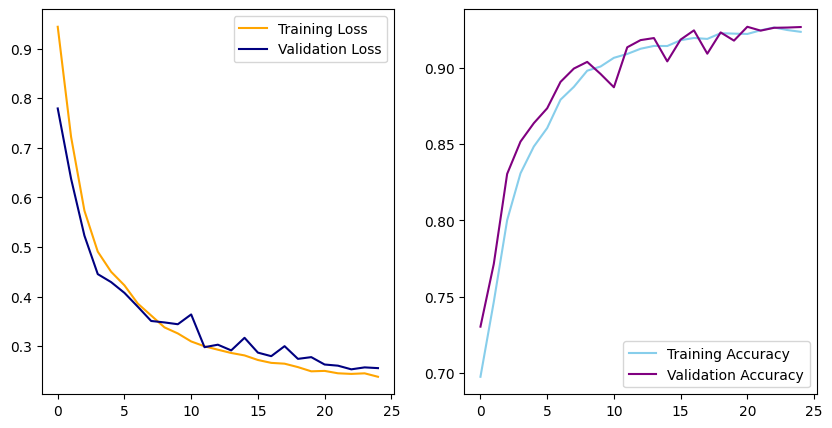

In [95]:
# took this code from my lab on regression and keras
train_loss = res.history['loss']
test_loss = res.history['val_loss']

train_mse = res.history['accuracy']
test_mse = res.history['val_accuracy']

# took this code from my project 3 when I was constructing graphs
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(train_loss, label = 'Training Loss', color = 'orange')
ax[0].plot(test_loss, label = 'Validation Loss', color = 'navy')
ax[0].legend()

ax[1].plot(train_mse, label = 'Training Accuracy', color = 'skyblue')
ax[1].plot(test_mse, label = 'Validation Accuracy', color = 'purple')
ax[1].legend();

In [96]:
res.history['accuracy'][-1], res.history['val_accuracy'][-1]

(0.9236153960227966, 0.9267596006393433)

In [98]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 2561.6255
Test Accuracy : 0.1765
